In [13]:
from sklearn.datasets import load_digits


# Chargez le jeu de données MNIST
digits = load_digits()
X, y = digits["data"], digits["target"]


In [14]:
digits["target"]

array([0, 1, 2, ..., 8, 9, 8])

In [15]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [16]:
# Normalisation
X /= 255

In [17]:
X.shape

(1797, 64)

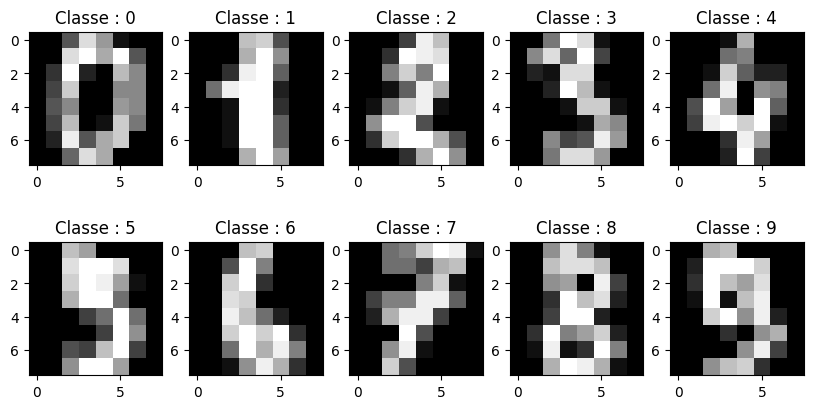

In [18]:

from matplotlib import pyplot as plt 
import seaborn as sns

# Affichez quelques images
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(X[i].reshape(8, 8), cmap="gray")
    ax.set_title(f"Classe : {y[i]}")
plt.show()

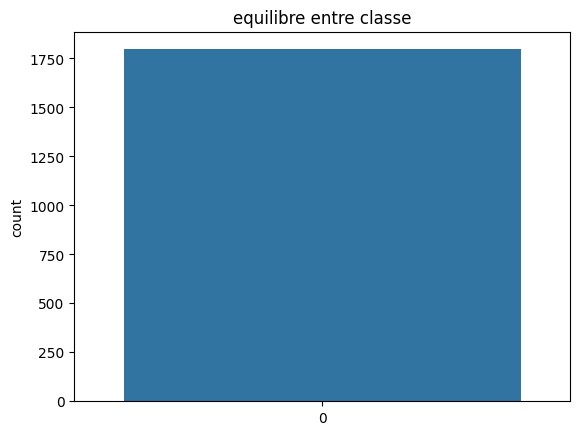

In [20]:
# Analysez la distribution des classes
sns.countplot(y)
plt.title('equilibre entre classe')
plt.show()

Text(0.5, 1.0, '4')

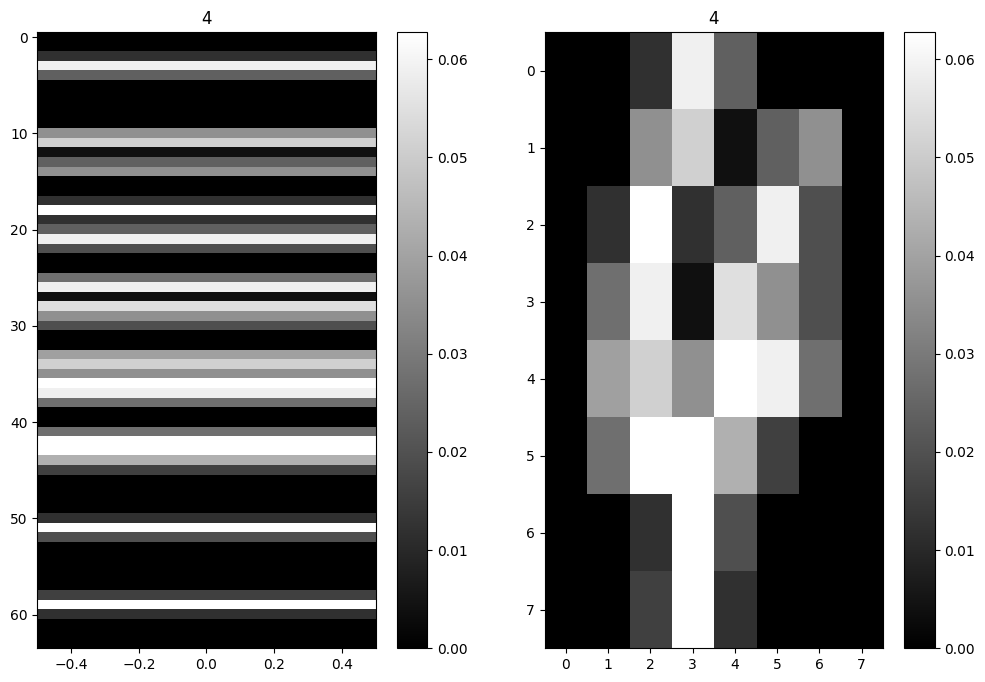

In [22]:
import numpy as np
n = 640

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.imshow(np.reshape( X[n,:],(64,1)) , aspect='auto',cmap='gray')
plt.colorbar()
plt.title(y[n])

plt.subplot(1,2,2)
plt.imshow(np.reshape( X[n,:],(8,8)) , aspect='auto',cmap='gray')
plt.colorbar()
plt.title(y[n])

Accuracy: 0.8944444444444445
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        33
           1       0.70      0.82      0.75        28
           2       0.91      0.91      0.91        33
           3       0.97      0.97      0.97        34
           4       0.98      0.91      0.94        46
           5       0.95      0.83      0.89        47
           6       0.97      0.97      0.97        35
           7       0.81      1.00      0.89        34
           8       1.00      0.67      0.80        30
           9       0.76      0.85      0.80        40

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.91      0.89      0.89       360



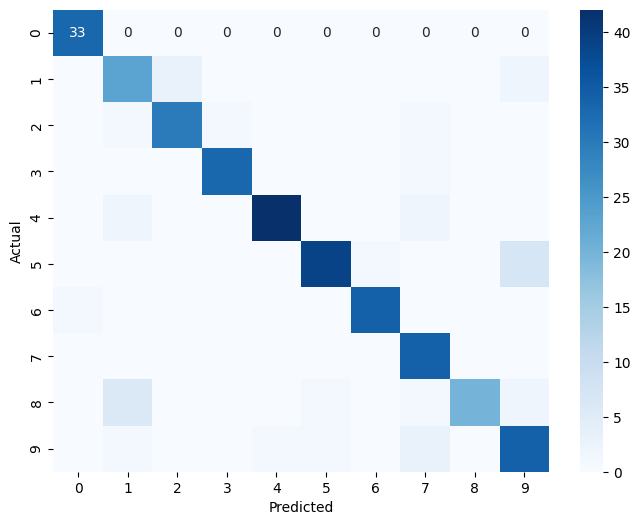

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


# Divisez les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créez un modèle de régression logistique
model = LogisticRegression(max_iter=100)

# Entraînez le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Prédisez les étiquettes sur l'ensemble de test
y_pred_logistic = model.predict(X_test)

# Évaluez les performances du modèle
accuracy = accuracy_score(y_test, y_pred_logistic)
report = classification_report(y_test, y_pred_logistic)
conf_matrix = confusion_matrix(y_test, y_pred_logistic)

# Affichez l'exactitude et le rapport de classification
print(f"Accuracy: {accuracy}")
print(report)

# Affichez la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
#créer la matrice de confusion 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_logistic)
print(cm)
# + id="5410826c"

[[33  0  0  0  0  0  0  0  0  0]
 [ 0 23  3  0  0  0  0  0  0  2]
 [ 0  1 30  1  0  0  0  1  0  0]
 [ 0  0  0 33  0  0  0  1  0  0]
 [ 0  2  0  0 42  0  0  2  0  0]
 [ 0  0  0  0  0 39  1  0  0  7]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  0  0 34  0  0]
 [ 0  6  0  0  0  1  0  1 20  2]
 [ 0  1  0  0  1  1  0  3  0 34]]
